In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import plotly.graph_objects as go
import numpy as np

In [ ]:
iris = pd.read_csv('/content/drive/MyDrive/Projeto iris/IRIS.csv')
display(iris)

In [22]:
X = iris.drop('species', axis=1)
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Modelo de classificação (usando KNN como exemplo)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [24]:
# Previsões
y_pred = knn_model.predict(X_test)

# Avaliação do modelo
print(f'Acurácia: {accuracy_score(y_test, y_pred)}')
print(f'Relatório de Classificação:\n{classification_report(y_test, y_pred)}')

Acurácia: 1.0
Relatório de Classificação:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [31]:
# Visualização da decisão do modelo com Plotly
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Fazer predições na grade
Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel())])
Z = Z.reshape(xx.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [37]:
# Adicionar coluna de predições ao conjunto de dados para visualização
iris['predicted_species'] = knn_model.predict(X)

# Visualização com Plotly Express
fig = px.scatter(iris, x='petal_length', y='petal_width', color='predicted_species', symbol='species',
                 title='Predições do Modelo KNN para Espécies de Íris',
                 labels={'petal_length': 'Comprimento da Pétala', 'petal_width': 'Largura da Pétala'},
                 color_discrete_map={'Iris-setosa': 'blue', 'Iris-versicolor': 'green', 'Iris-virginica': 'red'},
                 symbol_map={'Iris-setosa': 'circle', 'Iris-versicolor': 'circle', 'Iris-virginica': 'circle'})

# Mostrar a figura
fig.show()

In [38]:
fig = px.box(iris, x='species', y=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
             title='Distribuição das Medidas de Sépalas e Pétalas por Espécie',
             labels={'value': 'Medida', 'variable': 'Característica'},
             color='species',
             color_discrete_map={'Iris-setosa': 'blue', 'Iris-versicolor': 'green', 'Iris-virginica': 'red'})

fig.show()

<ipython-input-39-4e527f6e6a47>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




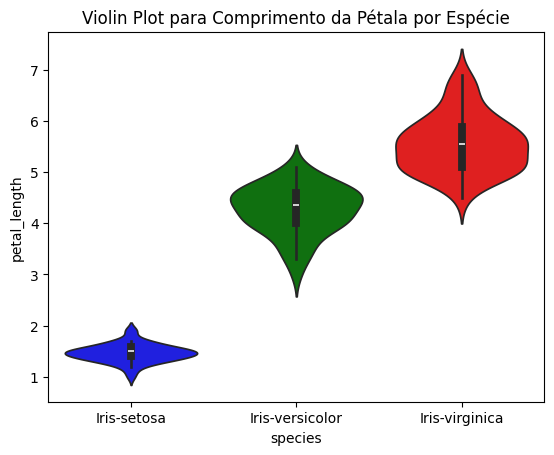

In [39]:
sns.violinplot(x='species', y='petal_length', data=iris, palette={'Iris-setosa': 'blue', 'Iris-versicolor': 'green', 'Iris-virginica': 'red'})
plt.title('Violin Plot para Comprimento da Pétala por Espécie')
plt.show()

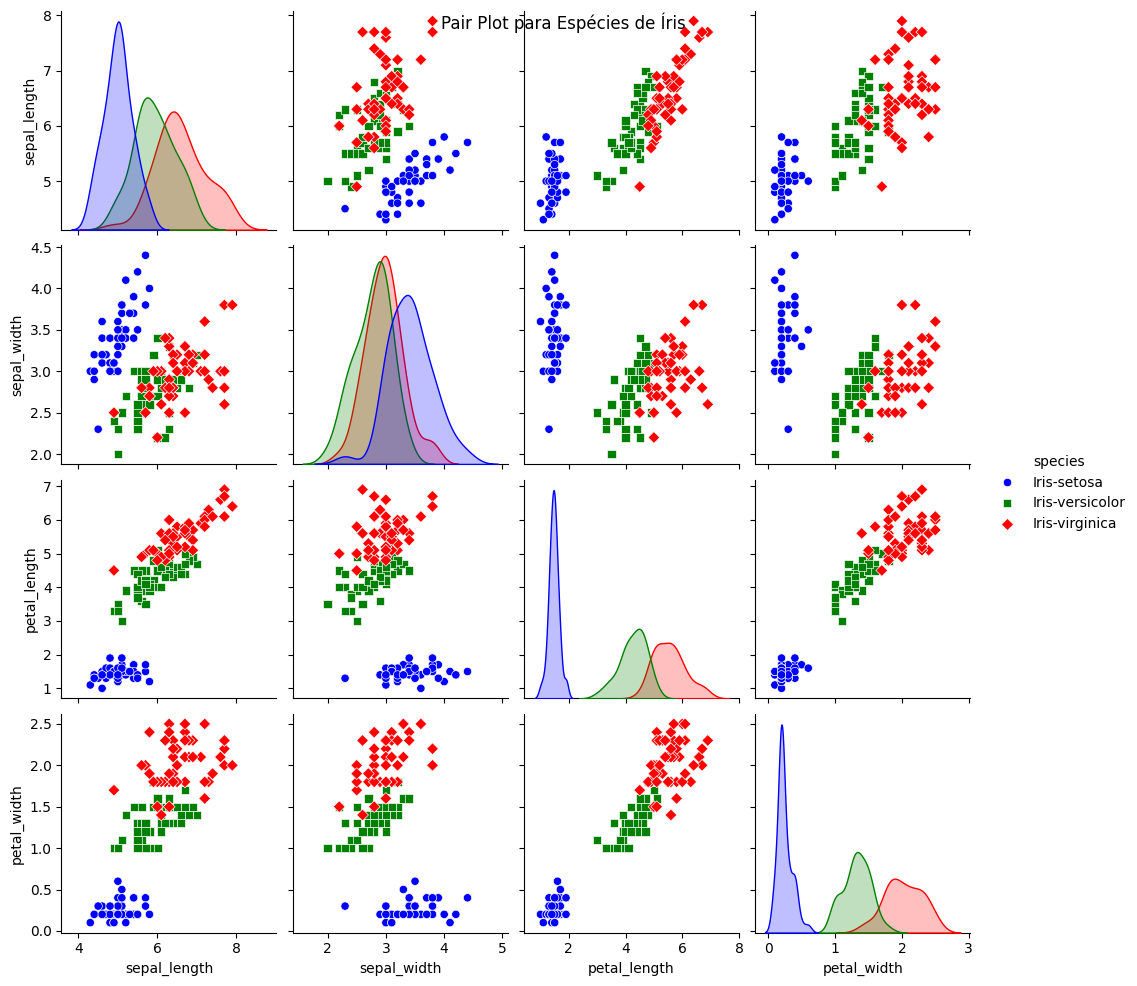

In [41]:
sns.pairplot(iris, hue='species', markers=['o', 's', 'D'], palette={'Iris-setosa': 'blue', 'Iris-versicolor': 'green', 'Iris-virginica': 'red'})
plt.suptitle('Pair Plot para Espécies de Íris')
plt.show()

In [43]:
from sklearn.neighbors import KNeighborsClassifier

# Suponha que "knn_model" seja o seu modelo KNN já treinado

def prever_especie(sepal_length, sepal_width, petal_length, petal_width):
    # Realizar a previsão usando o modelo KNN
    medidas = [[sepal_length, sepal_width, petal_length, petal_width]]
    especie_prevista = knn_model.predict(medidas)

    return especie_prevista[0]

# Exemplo de uso da função
sepal_length_input = float(input("Comprimento da Sépala: "))
sepal_width_input = float(input("Largura da Sépala: "))
petal_length_input = float(input("Comprimento da Pétala: "))
petal_width_input = float(input("Largura da Pétala: "))

especie_prevista = prever_especie(sepal_length_input, sepal_width_input, petal_length_input, petal_width_input)

print(f"A espécie prevista é: {especie_prevista}")


Comprimento da Sépala: 1.7
Largura da Sépala: 1.7
Comprimento da Pétala: 1.9
Largura da Pétala: 1.9
A espécie prevista é: Iris-setosa


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

